# AirBnB Capstone
Airbnb price prediction For Austin TX market with Machine Learning.

1. Project background and aim
Airbnb is a internet marketplace for short-term housing and apartment rentals. It allows you to, rent out your home or rent out your empty bedrooms. As most of the hosts do this as a secondary source of income they really don't know how to optime their nightly rental price. In many areas, renters are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. Since Airbnb is a market, the amount a host can charge is ultimately tied to market prices.

Airbnb provides hosts with general guidance, there are no easy methods to determine the best price for your rental, a side from comparing your listing to similar ones and capy the prices, which, with a market so dynamic would require a lot of work and constant price updates.

The aim of this project is to propose a data-driven solution, by using machine learning to predict rental price.

For this first part of the project, I will clean and prepare the dataset exported from the Inside AirBnb website database.

2. Data Description
Airbnb does not release any data on the listings in its marketplace, a but separate group named Inside Airbnb scrapes and compiles publicly available information about many cities Airbnb's listings from the Airbnb web-site. For this project, their data set scraped on April 16, 2021, on the city of Austin, TX, is used. It contains information on all Austin's Airbnb listings active on that date (over 10,000).

Each row in the data set is a listing available for rental in Airbnb's site. The columns describe different characteristics of each listing.

Some of the more important features this project will look into are the following:

accommodates: the number of guests the rental can accommodate
bedrooms: number of bedrooms included in the rental
bathrooms: number of bathrooms included in the rental
beds: number of beds included in the rental
price: nightly price for the rental

In [5]:
#pip install decompose

In [6]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical analysis
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import shapefile as shp
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import descartes

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')

Libraries imported.


# Cleaning

In [7]:
#!pwd to check the working directory
raw_df = pd.read_csv('C:/Users/Brendan/Desktop/GitHub/airbnbCapstone/16_April_21/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 10109 Airbnb listings


id                        listing_url       scrape_id last_scraped  \
0  2265  https://www.airbnb.com/rooms/2265  20210416175518   2021-04-18   
1  5245  https://www.airbnb.com/rooms/5245  20210416175518   2021-04-18   
2  5456  https://www.airbnb.com/rooms/5456  20210416175518   2021-04-23   

                                                name  \
0   Zen-East in the Heart of Austin (monthly rental)   
1  Eco friendly, Colorful, Clean, Cozy monthly share   
2          Walk to 6th, Rainey St and Convention Ctr   

                                         description  \
0  Zen East is situated in a vibrant & diverse mu...   
1  Situated in a vibrant & diverse multicultural ...   
2  Great central  location for walking to Convent...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  My neighborhood is ideally located if you want...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/4187/52d4f5d0...     2466   
1  https://a0.muscache.com/pictures/5167505/b33b5...     2466   
2  https://a0.muscache.com/pictures/14084884/b5a3...     8028   

                                 host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/2466     Paddy  2008-08-23   
1  https://www.airbnb.com/users/show/2466     Paddy  2008-08-23   
2  https://www.airbnb.com/users/show/8028    Sylvia  2009-02-16   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   

                                          host_about  host_response_time  \
0  I am a long time resident of Austin. I earned ...  within a few hours   
1  I am a long time resident of Austin. I earned ...  within a few hours   
2  I am a licensed Real Estate Broker and owner o...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  81%                 f   
1               100%                  81%                 f   
2               100%                  92%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/2466/profile_...   
1  https://a0.muscache.com/im/users/2466/profile_...   
2  https://a0.muscache.com/im/users/8028/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/2466/profile_...      East Downtown   
1  https://a0.muscache.com/im/users/2466/profile_...      East Downtown   
2  https://a0.muscache.com/im/users/8028/profile_...      East Downtown   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  3.0                        3.0   
2                  1.0                        1.0   

                                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'reviews', 'kba']                    t   
2              ['email', 'phone', 'reviews', 'kba']                    t   

  host_identity_verified                 neighbourhood  \
0                      t                           NaN   
1                      t                           NaN   
2                      t  Austin, Texas, United States   

   neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude  \
0                   78702                           NaN  30.27752  -97.71377   
1                   78702                           NaN  30.27614  -97.71320   
2                   78702                           NaN  30.26057  -97.73441   

           property_type        room_type  accommodates  bathrooms  \
0           Entire house  Entire home/apt             4        NaN   
1  Private room in house     Private room             2       

Dropping Initial Colunms
Free text columns will be dropped and other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).

In [8]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'picture_url', 'host_neighbourhood', 'neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [9]:
df.isna().sum()

id                                                  0
host_since                                        295
host_response_time                               3898
host_response_rate                               3898
host_acceptance_rate                             3748
host_is_superhost                                 295
host_listings_count                               295
host_total_listings_count                         295
host_has_profile_pic                              295
host_identity_verified                            295
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    10109
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       10109
bathrooms_text              

In [10]:
df.drop(['neighbourhood_group_cleansed', 
         'bathrooms', 'calendar_updated', 'license',], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

In [11]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

295


host_since host_response_time host_response_rate host_acceptance_rate  \
id                                                                             
70258         NaN                NaN                NaN                  NaN   
73289         NaN                NaN                NaN                  NaN   
78035         NaN                NaN                NaN                  NaN   
80725         NaN                NaN                NaN                  NaN   
174828        NaN                NaN                NaN                  NaN   

       host_is_superhost  host_listings_count  host_total_listings_count  \
id                                                                         
70258                NaN                  NaN                        NaN   
73289                NaN                  NaN                        NaN   
78035                NaN                  NaN                        NaN   
80725                NaN                  NaN                        NaN   
174828               NaN                  NaN                        NaN   

       host_has_profile_pic host_identity_verified  neighbourhood_cleansed  \
id                                                                           
70258                   NaN                    NaN                   78704   
73289                   NaN                    NaN                   78705   
78035                   NaN                    NaN                   78704   
80725                   NaN                    NaN                   78703   
174828                  NaN                    NaN                   78752   

        latitude  longitude      property_type        room_type  accommodates  \
id                                                                              
70258   30.23644  -97.76611  Entire guesthouse  Entire home/apt             3   
73289   30.29016  -97.74478   Entire apartment  Entire home/apt             4   
78035   30.25659  -97.76772       Entire house  Entire home/apt             4   
80725   30.28251  -97.76874    Entire bungalow  Entire home/apt             5   
174828  30.33238  -97.71233       Entire house  Entire home/apt            10   

       bathrooms_text  bedrooms  beds  \
id                                      
70258          1 bath       1.0   1.0   
73289         2 baths       2.0   2.0   
78035         3 baths       4.0   4.0   
80725         2 baths       3.0   3.0   
174828        2 baths       4.0   6.0   

                                                amenities    price  \
id                                                                   
70258   ["Heating", "Cooking basics", "Dryer", "Iron",...  $225.00   
73289   ["Heating", "Keypad", "Dryer", "Iron", "Washer...   $97.00   
78035   ["Carbon monoxide alarm", "Children\u2019s boo...  $750.00   
80725   ["Heating", "Cooking basics", "Host greets you...  $150.00   
174828  ["Pets allowed", "Heating", "Indoor fireplace"...  $375.00   

        minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                               
70258                2              28                     2.0   
73289               30            1125                    30.0   
78035                4              60                     4.0   
80725               30            1125                    30.0   
174828               3             365                     3.0   

        maximum_minimum_nights  minimum_maximum_nights  \
id                                                       
70258                      2.0                    28.0   
73289                     30.0                  1125.0   
78035                      4.0                    60.0   
80725                     30.0                  1125.0   
174828                     3.0                  1125.0   

        maximum_maximum_nights  minimum_nights_avg_ntm  \
id                                                       
70258                     28.0   

In [12]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [13]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

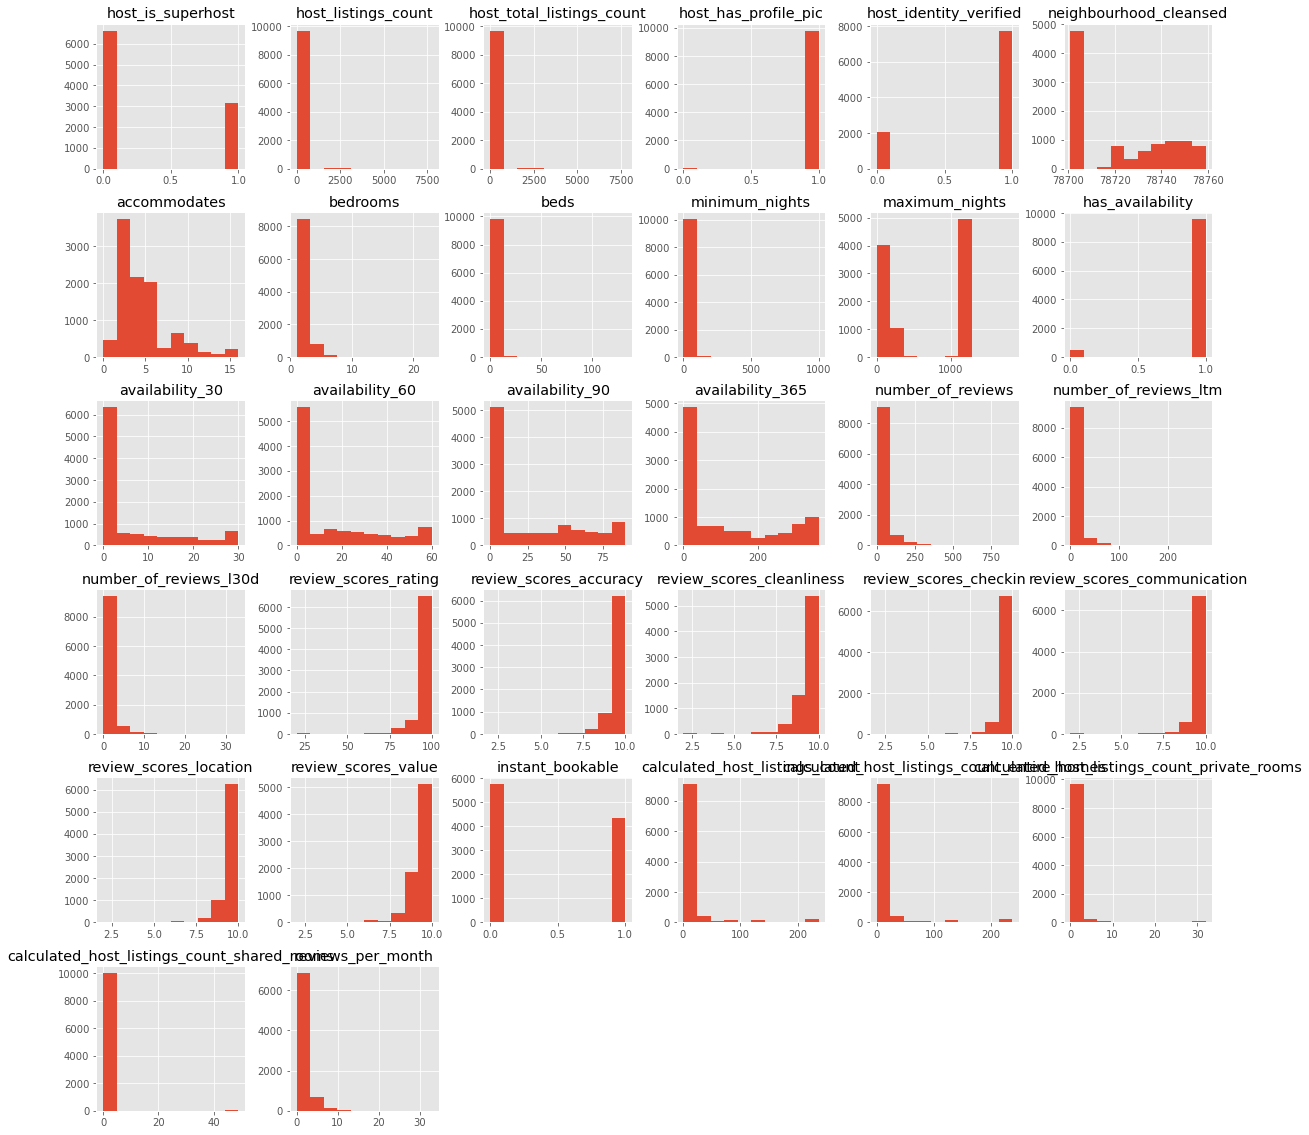

In [14]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

host_since
This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (July 21, 2019). The original column will be left in initially for EDA, and dropped later.

In [15]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (pd.datetime(2019, 7, 21) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1351.0
Median days as host: 1394.0


host_response_time
About a third of rows don't have a value for host_response_time, and the majority of these have also not yet been reviewed. Therefore this section of the data set consists primarily of properties which have not yet had a completed stay (most likely properties which have not yet had a booking, although may also include properties that have a booking currently occuring). Although this is a considerable proportion of the dataset, these listings will be retained in the data because they are still legitimate properties with advertised prices, and are still part of the comparative market when considering the price for which to advertise your Airbnb listing. However, if the dataset being used had the actual average price paid as its target, it would be necessary to drop these rows because they would not have a value, as they have not yet been booked.

It is worth noting, however, that this group of listings probably also contains a large number of 'inactive' listings. These are properties which have been speculatively listed on Airbnb but either have their calendars closed (so no stays can be booked), or have prices which are notably higher than other properties in their area. Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [16]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.455238
unknown               0.385597
within a few hours    0.082896
within a day          0.050054
a few days or more    0.026214
Name: host_response_time, dtype: float64

host_response_rate
A similar story is true for host_response_rate, with about a third of values being null. This will also be kept as its own category, after grouping other values into meaningful groups (i.e. transforming this into a categorical feature, rather than a numerical one). Because about 75% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [17]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 72.6%


In [18]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       4511
unknown    3898
90-99%      747
50-89%      664
0-49%       289
Name: host_response_rate, dtype: int64

property_type
Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories Apartment, House and Other will be used, as most properties can be classified as either apartment or house.

In [19]:
df.property_type.value_counts()

Entire house                          3035
Entire apartment                      1963
Private room in house                 1299
Entire condominium                     917
Entire guesthouse                      475
Private room in apartment              392
Entire serviced apartment              331
Entire townhouse                       264
Entire bungalow                        212
Entire guest suite                     207
Entire loft                            130
Private room in condominium            107
Private room in townhouse              106
Camper/RV                               69
Shared room in apartment                65
Tiny house                              57
Entire cottage                          55
Shared room in house                    40
Entire villa                            37
Private room in guest suite             35
Room in boutique hotel                  29
Private room in bed and breakfast       27
Private room in bungalow                24
Private roo

In [20]:
######### Needs to be worked on ############
# joining types of houses to houses & type of apartment to apartment
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

bathrooms, bedrooms and beds
Missing values will be replaced with the median (to avoid strange fractions).

In [21]:
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

price
Price will be converted to an integer. Currently it is a string because there is a currency sign.

In [22]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

first_review and last_review
Almost 20 percent of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information because reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an unknown category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [23]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 23.8%
Null values in 'review_scores_rating': 24.9%


In [24]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review/scrapped data date
df['time_since_first_review'] = (pd.datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

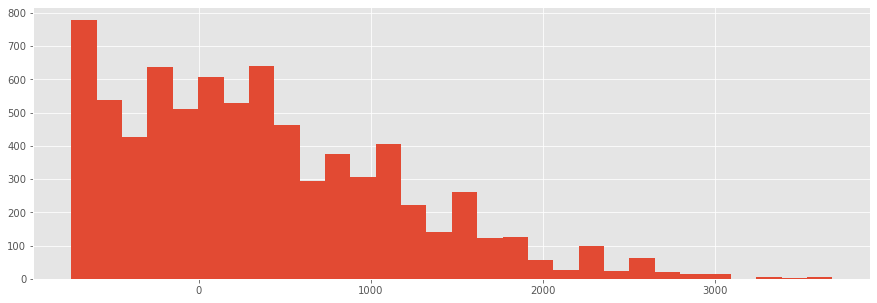

In [25]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [26]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [27]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')


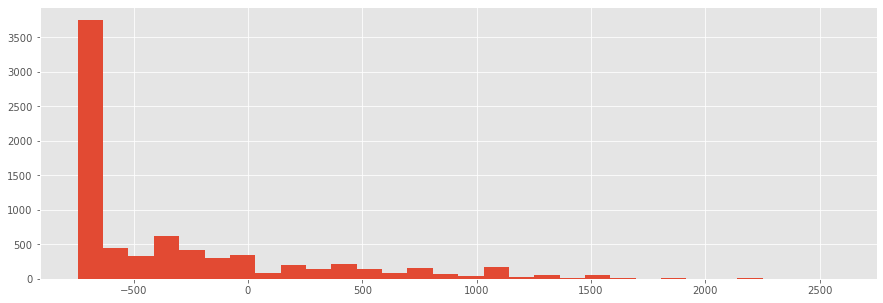

In [28]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);


In [29]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [30]:
# Dropping last_review
df.drop('last_review', axis=1, inplace=True)

In [31]:
df.head()
df.dtypes

host_since                                      datetime64[ns]
host_response_time                                      object
host_response_rate                                      object
host_acceptance_rate                                    object
host_is_superhost                                      float64
host_listings_count                                    float64
host_total_listings_count                              float64
host_has_profile_pic                                   float64
host_identity_verified                                 float64
neighbourhood_cleansed                                   int64
property_type                                           object
room_type                                               object
accommodates                                             int64
bathrooms_text                                          object
bedrooms                                               float64
beds                                                   

In [32]:
listings_cleaned = df.to_csv('C:/Users/Brendan/Desktop/GitHub/airbnbCapstone/16_April_21/listings-cleaned.csv', index=id, header=True)

# Exploratory Data Analysis

In [33]:
df = pd.read_csv('C:/Users/Brendan/Desktop/GitHub/airbnbCapstone/16_April_21/listings-cleaned.csv', index_col=0)

In [34]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])

In [35]:
print(f"From hosts listed on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent on {max(df.host_since).strftime('%d %B %Y')}.")

From hosts listed on the site, the first joined on 03 March 2008, and the most recent on 04 April 2021.


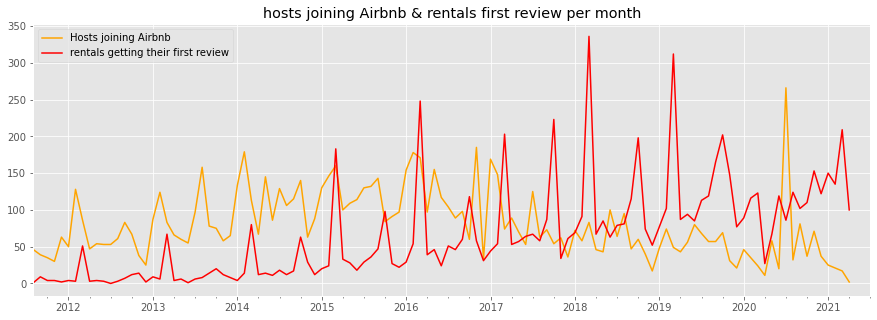

In [36]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='rentals getting their first review', color='red')
plt.title('hosts joining Airbnb & rentals first review per month')
plt.legend()
plt.xlim('2011-08-21', '2021-07-20') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [37]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [38]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

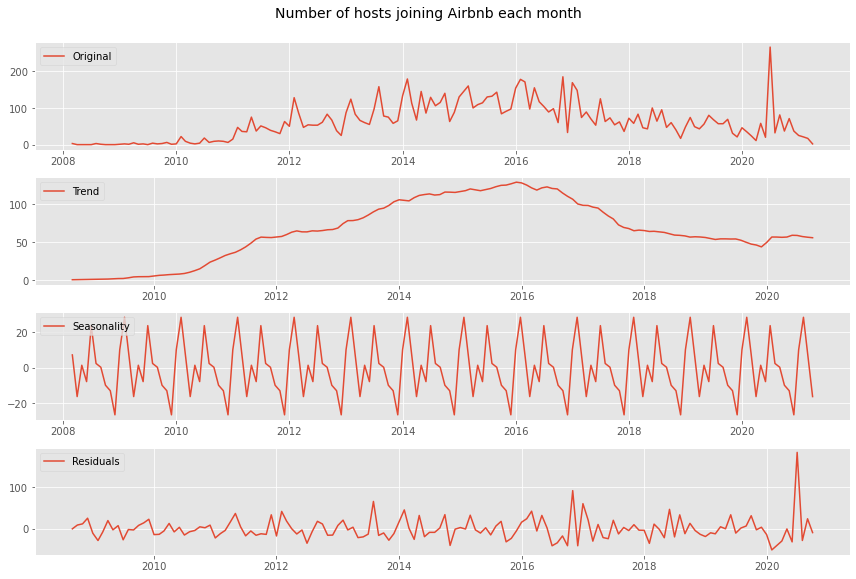

In [39]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

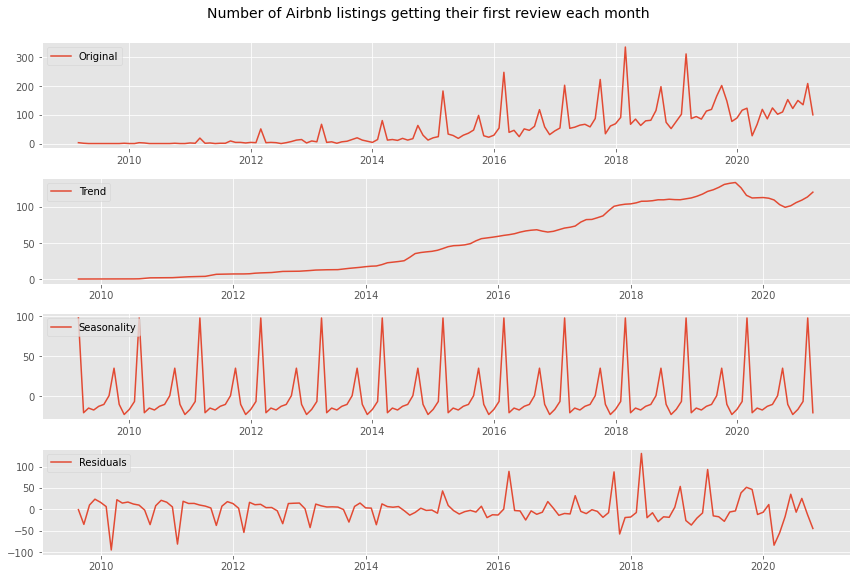

In [40]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

As seen above, there is a clear seasonality. Every year, you see 3 peaks towards hosts joining;at the beggining of the year, April, August, October and December. The number of hosts joining Airbnb has been pretty erratic through the years and it's worth to point out the huge peak happening on 2020.

Another important pattern to observe is the number of listings per owner/host. There are a number of professional Airbnb management companies which host a large number of listings under a single host profile. However, there is no consistent upwards trend in the average number of properties managed by each host.

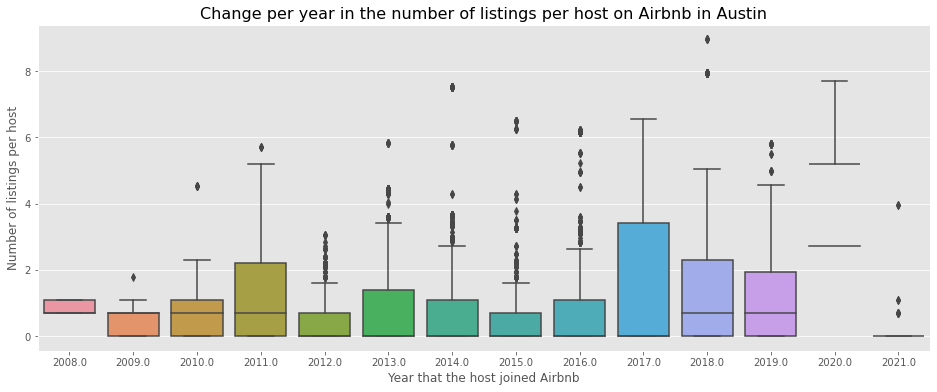

In [43]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Austin', fontsize=16)
plt.show()

In [45]:
print("Average listings per host per year:")
print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average listings per host per year:
host_since
2008-01-01      2.14
2009-01-01      1.82
2010-01-01      6.26
2011-01-01      8.40
2012-01-01      2.32
2013-01-01     13.77
2014-01-01     39.12
2015-01-01     11.34
2016-01-01     51.03
2017-01-01     59.63
2018-01-01    236.02
2019-01-01     17.74
2020-01-01    172.22
2021-01-01      2.17
Name: host_listings_count, dtype: float64


In [46]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

host_since  host_listings_count
id                                      
39580699 2016-11-19                476.0
23086278 2016-10-21                496.0
23432399 2015-04-14                512.0
30369615 2015-04-07                653.0
48406228 2017-11-15                699.0
25454542 2014-01-03               1827.0
48166083 2020-09-23               2232.0
39279269 2018-06-11               2844.0
48675742 2018-02-24               7755.0
49157286        NaT                  NaN

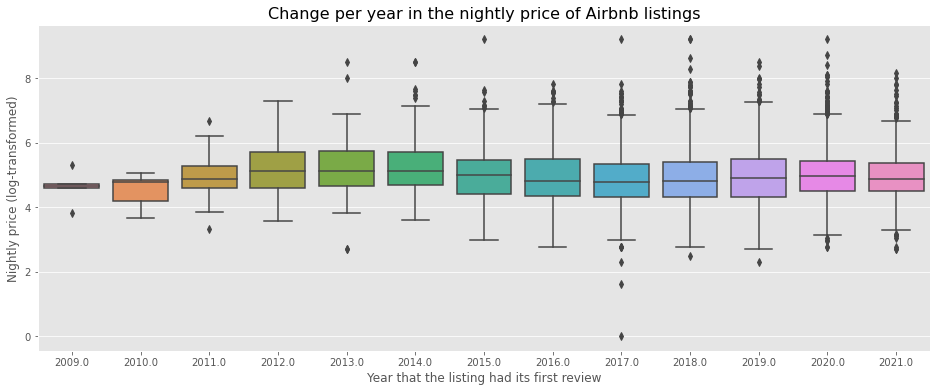

In [47]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings', fontsize=16)
plt.show()

In [48]:
print("Mean nightly price of listings in each year on Airbnb:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb:
first_review
2009-01-01    112.60
2010-01-01    103.00
2011-01-01    172.59
2012-01-01    254.95
2013-01-01    299.40
2014-01-01    294.55
2015-01-01    235.94
2016-01-01    217.73
2017-01-01    213.20
2018-01-01    235.16
2019-01-01    218.61
2020-01-01    248.48
2021-01-01    210.10
Name: price, dtype: float64


In [49]:
print("Median nightly price of listings in each year on Airbnb:")
print(round(df.set_index('first_review').price.resample('YS').median(),2))

Median nightly price of listings in each year on Airbnb:
first_review
2009-01-01    104.0
2010-01-01    118.5
2011-01-01    130.5
2012-01-01    170.5
2013-01-01    169.0
2014-01-01    167.5
2015-01-01    148.0
2016-01-01    125.0
2017-01-01    121.0
2018-01-01    125.0
2019-01-01    134.0
2020-01-01    145.0
2021-01-01    132.0
Name: price, dtype: float64


In [50]:
#host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [51]:
df.describe()

host_is_superhost  host_listings_count  host_total_listings_count  \
count        9814.000000          9814.000000                9814.000000   
mean            0.323008            54.087019                  54.087019   
std             0.467650           305.733521                 305.733521   
min             0.000000             0.000000                   0.000000   
25%             0.000000             1.000000                   1.000000   
50%             0.000000             1.000000                   1.000000   
75%             1.000000             4.000000                   4.000000   
max             1.000000          7755.000000                7755.000000   

       host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  \
count           9814.000000             9814.000000            10109.000000   
mean               0.999083                0.789484            78723.036898   
std                0.030271                0.407696               20.795429   
min                0.000000                0.000000            78701.000000   
25%                1.000000                1.000000            78704.000000   
50%                1.000000                1.000000            78722.000000   
75%                1.000000                1.000000            78745.000000   
max                1.000000                1.000000            78759.000000   

       accommodates      bedrooms          beds         price  minimum_nights  \
count  10109.000000  10109.000000  10109.000000  10109.000000     10109.00000   
mean       4.570383      1.924819      2.468493    266.578297         7.99545   
std        3.044928      1.198653      2.626559    525.346005        23.56830   
min        0.000000      1.000000      0.000000      0.000000         1.00000   
25%        2.000000      1.000000      1.000000     86.000000         1.00000   
50%        4.000000      2.000000      2.000000    148.000000         2.00000   
75%        6.000000      2.000000      3.000000    265.000000         3.00000   
max       16.000000     23.000000    132.000000  17599.000000       999.00000   

       maximum_nights  has_availability  availability_30  availability_60  \
count    10109.000000      10109.000000     10109.000000     10109.000000   
mean       608.351568          0.948660         5.927095        14.801662   
std        518.668574          0.220702         9.219380        19.564261   
min          1.000000          0.000000         0.000000         0.000000   
25%         30.000000          1.000000         0.000000         0.000000   
50%        365.000000          1.000000         0.000000         1.000000   
75%       1125.000000          1.000000        10.000000        28.000000   
max       1825.000000          1.000000        30.000000        60.000000   

       availability_90  availability_365  number_of_reviews  \
count     10109.000000      10109.000000       10109.000000   
mean         26.381442        110.128796          32.476605   
std          31.175933        129.777254          68.589926   
min           0.000000          0.000000           0.000000   
25%           0.000000          0.000000           1.000000   
50%           8.000000         47.000000           6.000000   
75%          52.000000        223.000000          30.000000   
max          90.000000        365.000000         891.000000   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
count           10109.000000            10109.000000           7596.000000   
mean                6.849342                0.737956             95.798973   
std                15.230382                1.662598              7.939286   
min                 0.000000                0.000000             20.000000   
25%                 0.000000                0.000000             95.000000   
50%                 0.000000                0.000000             98.000000   
75%                 6.000000                1.000000            100.0000

price

Looking at price distribution, advertised prices range from $0 to $17,599. The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site. Once you enter the dates you want to occupy the property, prices can vary a lot.

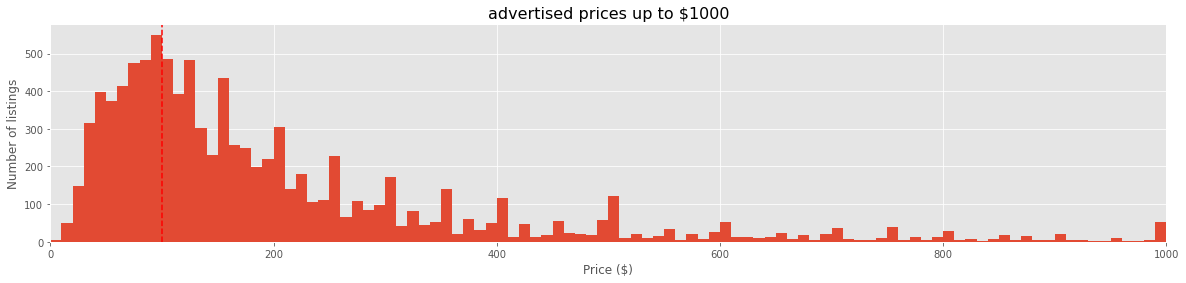

In [53]:
# Distribution of prices from $0 to $1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(100, color='red', linestyle='--')
plt.title("advertised prices up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

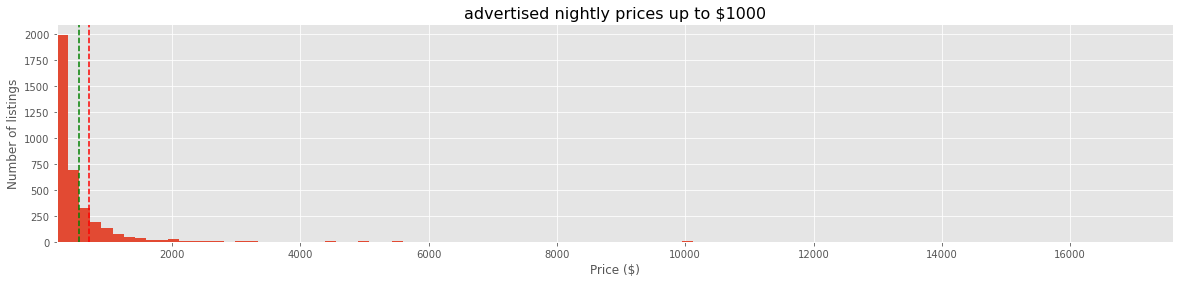

In [56]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(200, max(df.price)))
plt.margins(x=0)
plt.axvline(550, color='green', linestyle='--')
plt.axvline(700, color='red', linestyle='--')
plt.title("advertised nightly prices up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

There are notable drop-offs in prices at $100 (first graph, red line), $550 (second graph, green line) and $700 (second graph, red line). Values above £1,000 will be reduced to £1,000.

In [57]:
# Replacing values under $10 with $10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over $1000 with $1000
df.loc[df.price >= 1000, 'price'] = 1000

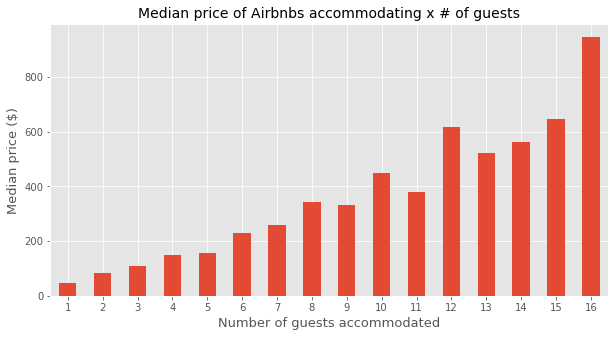

In [60]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating x # of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

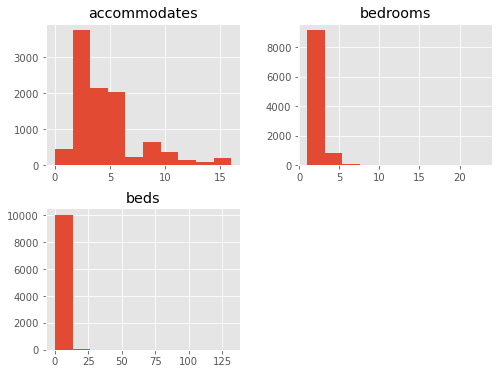

In [62]:
df[['accommodates', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [66]:
Exploratory_Analysis = df.to_csv('C:/Users/Brendan/Desktop/GitHub/airbnbCapstone/16_April_21/listings-Analysis.csv', index=id, header=True)